# Social Network Analysis - Python Handson

In [2]:
%pip install networkx[default]


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

## The Data

The data set is provided by Der Standard, one of the top Austrian newspapers.
In the online Standard people can post comments below articles and up/down vote comments.
The data set used in this handson and further in the project part of the course will consider a sample of those articles, comments, and votes. 

In [4]:
df = pd.read_csv('./data/Postings_01052019_15052019.csv', sep=';')

In [5]:
df.head()

ID_Posting  ID_Posting_Parent  ID_CommunityIdentity  \
0  1041073586       1.041073e+09                671476   
1  1041073839       1.041073e+09                566938   
2  1041073872       1.041069e+09                669286   
3  1041080734       1.041080e+09                671476   
4  1041080828                NaN                671476   

                                     PostingHeadline  \
0  Das hat gestern bereits der Voggenhuber angefü...   
1                                                NaN   
2                                                NaN   
3                  Sie haben doch nichts gefordert??   
4  Heute wäre der perfekte Tag für die SPÖ gewese...   

                                      PostingComment         PostingCreatedAt  \
0  schieder hatte dem inhaltlich nichts entgegenz...  2019-05-01 18:21:15.127   
1     ...und meinen Bezirk bekommst du als Erbe mit.  2019-05-01 18:28:22.040   
2  Nein, bei der ÖVP/FPÖ genauso passiert. Ich wo...  2019-05-01 18:29:05.533   
3  sie haben nur die regierung kritisiert. das di...  2019-05-01 22:37:56.010   
4  ihr noch nicht erfülltes versprechen, den silb...  2019-05-01 22:42:06.310   

      ID_Article   ArticlePublishingDate  \
0  2000102330973  2019-05-01 10:28:57.49   
1  2000102330973  2019-05-01 10:28:57.49   
2  2000102330973  2019-05-01 10:28:57.49   
3  2000102330973  2019-05-01 10:28:57.49   
4  2000102330973  2019-05-01 10:28:57.49   

                                        ArticleTitle ArticleChannel  \
0  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
1  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
2  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
3  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
4  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   

  ArticleRessortName UserCommunityName UserGender            UserCreatedAt  
0           Parteien       Ravenspower        NaN  2018-04-14 13:42:28.470  
1           Parteien        AlphaRomeo          m  2015-08-28 17:07:41.110  
2           Parteien        Hpolditsch        NaN  2018-03-06 20:03:42.737  
3           Parteien       Ravenspower        NaN  2018-04-14 13:42:28.470  
4           Parteien       Ravenspower        NaN  2018-04-14 13:42:28.470

There are different entities in the data set: 
* Users - identified by *ID_CommunityIdentity* (or *UserCommunityName*)
* Postings - identified by *ID_Posting*
* Articles - identified by *ID_Article*

Thus, there are different possibilities to build networks based on the posting data. 
We will concentrate now on the ***reply-to-network***. 


In [6]:
votes = pd.read_csv('./data/Votes_01052019_15052019.csv', sep=';')
votes.head()

ID_CommunityIdentity  ID_Posting  VoteNegative  VotePositive  \
0                675862  1041076570             1             0   
1                689023  1041076570             1             0   
2                 24810  1041076745             0             1   
3                673781  1041076745             0             1   
4                 24810  1041076831             0             1   

             VoteCreatedAt    UserCommunityName UserGender  \
0  2019-05-06 16:47:46.883  Heckscheibenwischer          m   
1  2019-05-01 22:19:06.240      Heinz Fettleber        NaN   
2  2019-05-01 23:54:54.600       Bruce Campbell          m   
3  2019-05-01 20:59:29.910         Erdäpfelsack        NaN   
4  2019-05-01 23:51:42.730       Bruce Campbell          m   

             UserCreatedAt  
0  2018-06-26 06:04:30.513  
1  2019-03-08 21:23:11.463  
2  2011-01-12 16:50:40.597  
3  2018-05-29 07:13:49.350  
4  2011-01-12 16:50:40.597

In [7]:
votes['UserGender'].value_counts()

UserGender
m    976927
w    235664
Name: count, dtype: int64

In [8]:
merged_df = pd.merge(df, votes, on="ID_Posting")

In [24]:
merged_df

ID_Posting  ID_Posting_Parent  ID_CommunityIdentity_x  \
0        1041073586       1.041073e+09                  671476   
1        1041073586       1.041073e+09                  671476   
2        1041073586       1.041073e+09                  671476   
3        1041080734       1.041080e+09                  671476   
4        1041080734       1.041080e+09                  671476   
...             ...                ...                     ...   
1570732  1041171868                NaN                  223390   
1570733  1041171868                NaN                  223390   
1570734  1041171868                NaN                  223390   
1570735  1041171868                NaN                  223390   
1570736  1041171868                NaN                  223390   

                                           PostingHeadline  \
0        Das hat gestern bereits der Voggenhuber angefü...   
1        Das hat gestern bereits der Voggenhuber angefü...   
2        Das hat gestern bereits der Voggenhuber angefü...   
3                        Sie haben doch nichts gefordert??   
4                        Sie haben doch nichts gefordert??   
...                                                    ...   
1570732                                                NaN   
1570733                                                NaN   
1570734                                                NaN   
1570735                                                NaN   
1570736                                                NaN   

                                            PostingComment  \
0        schieder hatte dem inhaltlich nichts entgegenz...   
1        schieder hatte dem inhaltlich nichts entgegenz...   
2        schieder hatte dem inhaltlich nichts entgegenz...   
3        sie haben nur die regierung kritisiert. das di...   
4        sie haben nur die regierung kritisiert. das di...   
...                                                    ...   
1570732           ich hab keine ahnung worum es da geht...   
1570733           ich hab keine ahnung worum es da geht...   
1570734           ich hab keine ahnung worum es da geht...   
1570735           ich hab keine ahnung worum es da geht...   
1570736           ich hab keine ahnung worum es da geht...   

                PostingCreatedAt     ID_Article   ArticlePublishingDate  \
0        2019-05-01 18:21:15.127  2000102330973  2019-05-01 10:28:57.49   
1        2019-05-01 18:21:15.127  2000102330973  2019-05-01 10:28:57.49   
2        2019-05-01 18:21:15.127  2000102330973  2019-05-01 10:28:57.49   
3        2019-05-01 22:37:56.010  2000102330973  2019-05-01 10:28:57.49   
4        2019-05-01 22:37:56.010  2000102330973  2019-05-01 10:28:57.49   
...                          ...            ...                     ...   
1570732  2019-05-05 11:57:11.233  2000101751957  2019-05-05 10:00:00.00   
1570733  2019-05-05 11:57:11.233  2000101751957  2019-05-05 10:00:00.00   
1570734  2019-05-05 11:57:11.233  2000101751957  2019-05-05 10:00:00.00   
1570735  2019-05-05 11:57:11.233  2000101751957  2019-05-05 10:00:00.00   
1570736  2019-05-05 11:57:11.233  2000101751957  2019-05-05 10:00:00.00   

                                              ArticleTitle ArticleChannel  \
0        1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
1        1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
2        1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
3        1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
4        1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
...                                                    ...            ...   
1570732  Österreichische Streamerinnen: "Als Frau kämpf...            Web   
1570733  Österreichische Streamerinnen: "Als Frau kämpf...            Web   
1570734  Österreichische Streamerinnen: "Als Frau kämpf...            Web   
1570735  Österreichische Streamerinnen: "Als Frau kämpf

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

ValueError: could not convert string to float: 'Das hat gestern bereits der Voggenhuber angeführt!'

In [11]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

ValueError: could not convert string to float: 'Das hat gestern bereits der Voggenhuber angeführt!'

In [12]:
votes

ID_CommunityIdentity  ID_Posting  VoteNegative  VotePositive  \
0                      675862  1041076570             1             0   
1                      689023  1041076570             1             0   
2                       24810  1041076745             0             1   
3                      673781  1041076745             0             1   
4                       24810  1041076831             0             1   
...                       ...         ...           ...           ...   
1570732                 53773  1041346123             0             1   
1570733                689735  1041346874             0             1   
1570734                533221  1041207677             0             1   
1570735                 83914  1041207758             0             1   
1570736                551362  1041207758             0             1   

                   VoteCreatedAt                       UserCommunityName  \
0        2019-05-06 16:47:46.883                     Heckscheibenwischer   
1        2019-05-01 22:19:06.240                         Heinz Fettleber   
2        2019-05-01 23:54:54.600                          Bruce Campbell   
3        2019-05-01 20:59:29.910                            Erdäpfelsack   
4        2019-05-01 23:51:42.730                          Bruce Campbell   
...                          ...                                     ...   
1570732  2019-05-11 12:57:14.050                   Franz der Wahnsinnige   
1570733  2019-05-10 17:24:25.793                                der.luda   
1570734  2019-05-06 17:54:21.983                  wink mit dem zaunpfahl   
1570735  2019-05-06 18:48:48.087  Für Doping im österreichischen Fußball   
1570736  2019-05-06 18:52:07.690                                    tt88   

        UserGender            UserCreatedAt  
0                m  2018-06-26 06:04:30.513  
1              NaN  2019-03-08 21:23:11.463  
2                m  2011-01-12 16:50:40.597  
3              NaN  2018-05-29 07:13:49.350  
4                m  2011-01-12 16:50:40.597  
...            ...                      ...  
1570732          m  2012-06-13 18:42:57.970  
1570733        NaN  2019-03-22 16:23:52.420  
1570734          w  2005-05-20 11:15:02.970  
1570735          m  2010-11-07 19:38:21.933  
1570736          m  2014-10-23 12:04:23.573  

[1570737 rows x 8 columns]

In [13]:
votes['UserGender'] = votes['UserGender'].map({'m': 1, 'w': -1})
# votes['UserGender'] = votes['UserGender'].fillna(0)
correlation_matrix = votes.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

ValueError: could not convert string to float: '2019-05-06 16:47:46.883'

In [14]:
votes['UserGender'].value_counts()

UserGender
 1.0    976927
-1.0    235664
Name: count, dtype: int64

## Reply-To-Network

The two fundamental components of a network are *nodes* and *edges*. 
In the anticipated reply-to-network nodes are the users (i.e., *ID_CommunityIdentity*). 
Edges between two nodes (i.e., users) are build if one user replys to a posting of another users. 

In [15]:
df[["ID_CommunityIdentity", "ID_Posting", "ID_Posting_Parent"]].head(15)

ID_CommunityIdentity  ID_Posting  ID_Posting_Parent
0                 671476  1041073586       1.041073e+09
1                 566938  1041073839       1.041073e+09
2                 669286  1041073872       1.041069e+09
3                 671476  1041080734       1.041080e+09
4                 671476  1041080828                NaN
5                 671476  1041080938       1.041081e+09
6                 523527  1041073564       1.041073e+09
7                  74674  1041073653       1.041073e+09
8                  74674  1041073766       1.041074e+09
9                  81444  1041073991                NaN
10                 74674  1041074052       1.041073e+09
11                 74674  1041074142       1.041073e+09
12                 81444  1041080903                NaN
13                608361  1041126226       1.041126e+09
14                237970  1041126236       1.041125e+09

A line in the table above shows that a user (i.e., *ID_CommunityIdentiy*) posted a comment. Every post has its own uniqe identifier (i.e., *ID_Posting*). If a user replys to a previous posting then the posting they are targeting is identified by *ID_Posting_Parent*. *NaN* shows that the posted comment is located in the root (i.e., it's not targeted towards any other comment). 

We want to bring the structure above into following format: 
* source, i.e., the replying user
* target, i.e., the targeted user
* weight, i.e., how often the source replied to the target

In other words, we are aiming for a *weighted edge-list*.

### Edges

In [16]:
edgeList = [
    [post.ID_CommunityIdentity, next(iter(df[df.ID_Posting == post.ID_Posting_Parent].ID_CommunityIdentity))] 
    for idx, post in df.iterrows()
    if ~np.isnan(post.ID_Posting_Parent)]

In [17]:
edgeList[:10]

[[671476, 233191],
 [566938, 640123],
 [669286, 680772],
 [671476, 51817],
 [671476, 678196],
 [523527, 10581],
 [74674, 679247],
 [74674, 665911],
 [74674, 575878],
 [74674, 600755]]

In [18]:
weightedEdgeList = [(edge[0],edge[1],edgeList.count(edge)) for edge in edgeList]
weightedEdgeList = list(set(weightedEdgeList))

KeyboardInterrupt: 

In [ ]:
weightedEdgeList[:10]

In [ ]:
edges = pd.DataFrame(weightedEdgeList, columns=['source','target','weight'])

In [ ]:
edges.head()

In [ ]:
edges.to_csv("reply_to_edges.csv", index=False)

### Graph

We use the *networkx* library.
Since we build a *reply-to-network* we have *source* nodes and *target* nodes. 
Thus, the network is directed.
Therefore, we use *nx.Digraph()*

In [19]:
edges = pd.read_csv("reply_to_edges.csv")

In [20]:
G = nx.from_pandas_edgelist(edges, 
                            source='source', 
                            target='target', 
                            edge_attr = 'weight',
                            create_using=nx.DiGraph())

In [22]:
G

In [32]:
import pandas as pd
import networkx as nx
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Step 1: Load data
data = merged_df[:10000]

# Step 2: Create a graph
G = nx.Graph()
# G = nx.DiGraph()

# Step 3: Encode graph
# Add nodes and edges based on your data

# For example:
for index, row in data.iterrows():
    user_node = row['UserCommunityName_x']
    article_node = row['ArticleTitle']
    community_node = row['ID_CommunityIdentity_x']

    # G.add_node(user_node, type='user', gender=row['UserGender_x'])
    G.add_node(article_node, type='article', channel=row['ArticleChannel'])
    G.add_node(community_node, type='community')

    G.add_edge(user_node, article_node, weight=row['VotePositive'] - row['VoteNegative'])
    G.add_edge(user_node, community_node)
    G.add_edge(article_node, community_node)

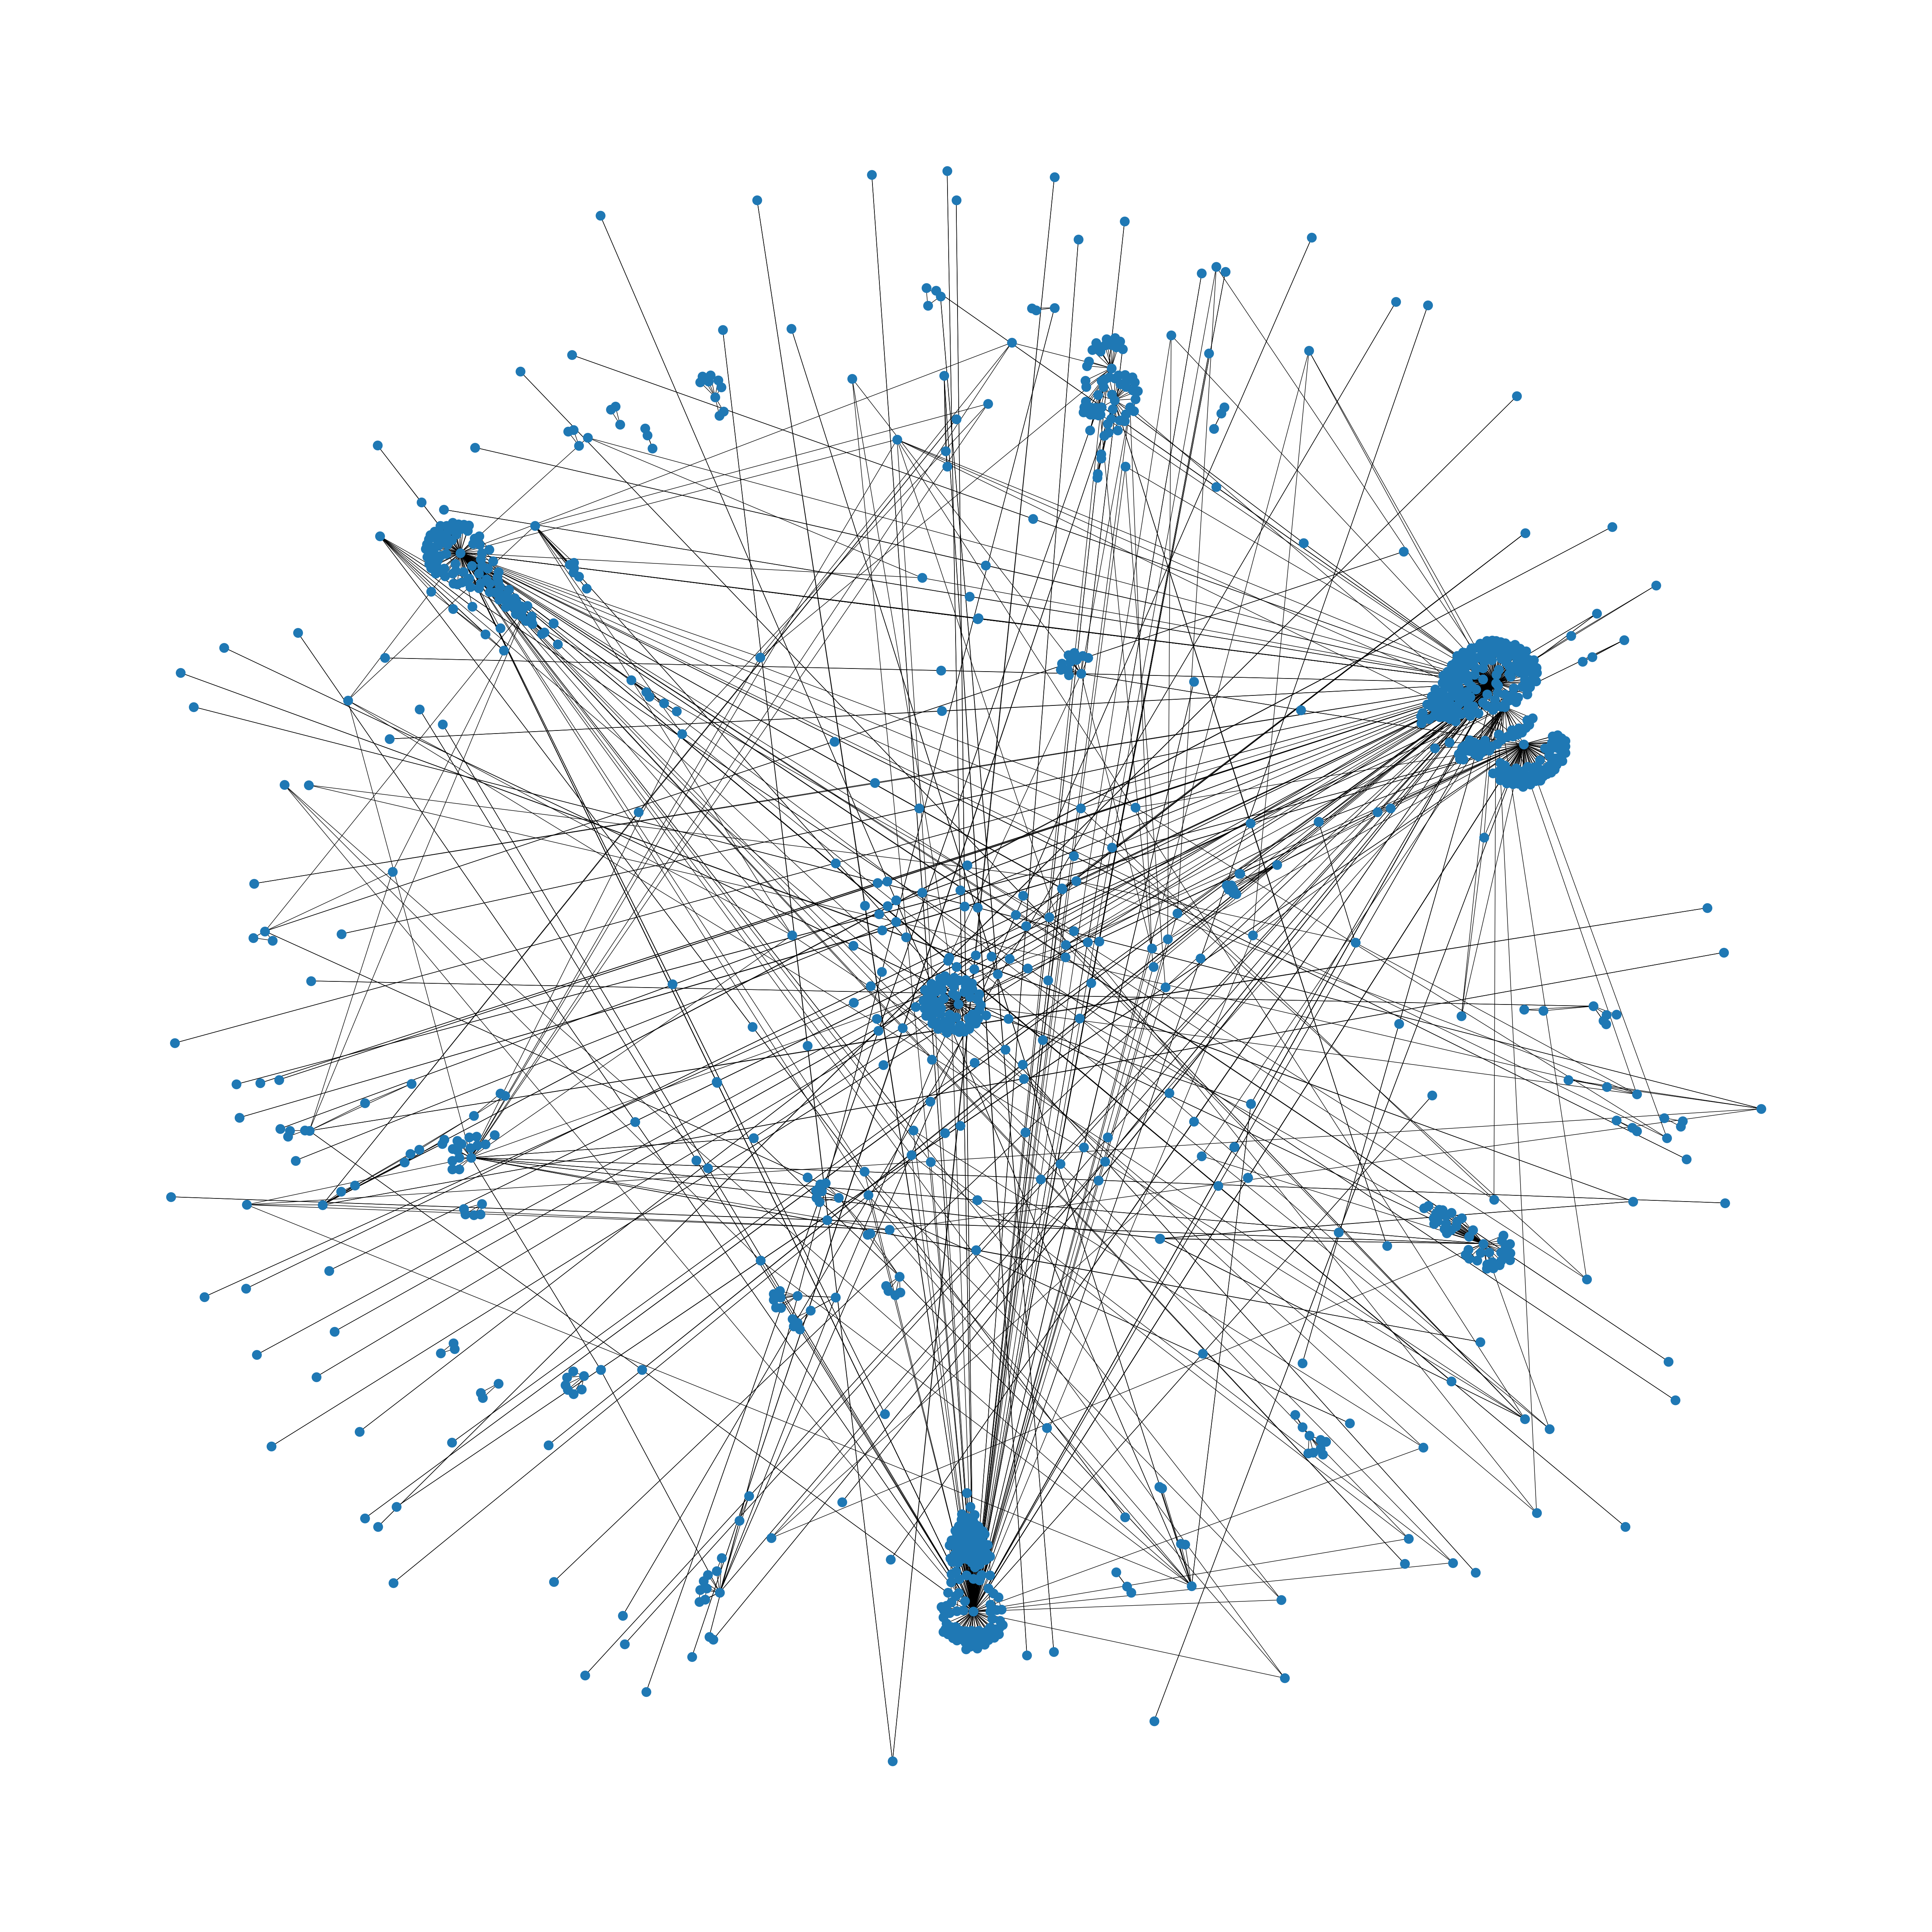

In [33]:
fig = plt.figure(figsize=(50,50))
nx.draw_spring(G)
plt.show()

### Basic Stats

In [ ]:
print(nx.info(G))

In [23]:
# number of edges with weight 1
len(edges[edges.weight == 1])

168203

In [24]:
# max weight of edges
edges.weight.max()

307

In [25]:
# average weight 
edges.weight.mean()

1.2338209046868251

### Network density and path lengths

In [ ]:
# network density
nx.density(G)

In [ ]:
# Average distance (i.e. average shortest path length)
nx.average_shortest_path_length(G)

The method average_shortest_path_length throws an exception if the underlying Graph is disconnected. Thus, one can calculate the average of all finite distances (i.e., existing shortest pathes) nx.single_source_shortest_path_length(G, N) delivers the length of all shortest pathes beginning from node N. Furthermore, the first shortest path is always the distance to itself (i.e., zero), which as to be filtered later on.

In [ ]:
# compute all distances
distances = [list(nx.single_source_shortest_path_length(G,N).values()) for N in G.nodes]
# Flatten the distances list! Currently list of lists of single node distances
# and filter out the unnecessary zeroes
distances = [distance for single_distances in distances for distance in single_distances if distance > 0]

In [ ]:
# average
np.mean(distances)

To consider the weight one can use e.g. nx.single_source_dijkstra_path_length() But watch out, what does weight in our case mean?

In [ ]:
# Diameter (i.e, longest shortest path)
np.max(distances)

### Connected components

G.subgraph(c) for c in nx.weakly_connected_components(G) delivers a Generator,which can be used to iterate over all weakly connected compontents (deliverd as a subgraph for further analysis)

In [ ]:
wccs = [c for c in (G.subgraph(c) for c in nx.weakly_connected_components(G))]

In [ ]:
# number of wccs
len(wccs)

In [ ]:
# number of wccs
nx.number_weakly_connected_components(G)

Sizes of the wccs:

nx.number_of_nodes() delivers the number of nodes of a graph. This can be done for all weakly connected components wcc in the weakly connected component list. Furthermore, with set() one can get the uniqe values.

In [ ]:
set([nx.number_of_nodes(wcc) for wcc in wccs])

If not the uniqe values are in focus, but the for example how often a wcc with n Nodes appear, one can use Counter().most_common() as follwing

In [ ]:
from collections import Counter
Counter([nx.number_of_nodes(wcc) for wcc in wccs]).most_common()

Strongly connected components:

In [ ]:
sccs = [c for c in (G.subgraph(c) for c in nx.strongly_connected_components(G))]
Counter([nx.number_of_nodes(scc) for scc in sccs]).most_common()

### Clustering Coefficients

**Local**

nx.clustering(G) returns back a dictionary with clustering coefficients of each node.
with the combination of sorted() and itemgetter() one can get a sorted list of (ID,clustering coeff.) tuples.

In [ ]:
from operator import itemgetter
sorted(nx.clustering(G).items(), key=itemgetter(1), reverse=True)[:5]

"*the clustering coefficient quantifies how close the neighbours of i are to being a clique.*" (lecture slides) i.e., how concentrated the neighbours of a nodes is.

**Global**

The global clustering coefficient can have alternative definitions:

1) as the average of the local clustering coefficients

In [ ]:
nx.average_clustering(G)

Note, that there might be differences if you use other tools (e.g., Gephi, Igraph, etc.).
So, why does networkx delivers a different average clustering coefficiet?
In order to find an answer, take a look at the nx.clustering() documentation (since nx.average_clustering is just averaging over the individual values). https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html
It says, that clustering coefficients for nodes with degrees lower than 2 is set to ZERO.

Thus, there is no right or wrong way of implementation, but you have to be aware what you are using.

2) as the ratio of triangles and connected triples

In [ ]:
nx.transitivity(G)

### Centrality Indices

**In-Degree**

[nx.in_degree_centrality(G)](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.in_degree_centrality.html#networkx.algorithms.centrality.in_degree_centrality) delivers in-degree-centrality of each node in a graph G.
Note, that the centralities are normalized.


With a combination of sorted() and itemgetter() one can again get a sorted list of (Node, centrality) tuples.
Where one can just take the first 5 for reporting.
Note, reverse=True means in decreasing order



In [ ]:
sorted(nx.in_degree_centrality(G).items(), key=itemgetter(1), reverse=True)[:5]

User *588542* is replied the most.

**Out-Degree**

In [ ]:
sorted(nx.out_degree_centrality(G).items(), key=itemgetter(1), reverse=True)[:5]

User *588542* also replies the most

**Eigenvector-Centrality**

Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node i is the i-th element of the vector 𝑥 defined by the equation

𝐴𝑥=𝜆𝑥

where 𝐴 is the adjacency matrix of the graph G with eigenvalue 𝜆. By virtue of the Perron–Frobenius theorem, there is a unique solution 𝑥, all of whose entries are positive, if 𝜆 is the largest eigenvalue of the adjacency matrix 𝐴
A.

In [ ]:
sorted(nx.eigenvector_centrality(G).items(), key=itemgetter(1), reverse=True)[:5]

**In-closeness centrality**

Closeness centrality of a node u is the reciprocal of the average shortest path distance to u over all n-1 reachable nodes.

𝐶(𝑢)= (𝑛−1)/∑𝑑(𝑣,𝑢)

where d(v, u) is the shortest-path distance between v and u, and n is the number of nodes that can reach u. Notice that the closeness distance function computes the incoming distance to u for directed graphs. To use outward distance, act on G.reverse().

In [ ]:
sorted(nx.closeness_centrality(G).items(), key=itemgetter(1), reverse=True)[:5]

**Out-closeness centrality**

In [ ]:
sorted(nx.closeness_centrality(G.reverse()).items(), key=itemgetter(1), reverse=True)[:5]

**Betweeness centrality**

Betweenness centrality of a node 𝑣 is the sum of the fraction of all-pairs shortest paths that pass through 𝑣

𝑐𝐵(𝑣)=∑𝜎(𝑠,𝑡|𝑣)/𝜎(𝑠,𝑡)

where, 𝜎(𝑠,𝑡) is the number of shortest (𝑠,𝑡)-paths, and 𝜎(𝑠,𝑡|𝑣) is the number of those paths passing through some node 𝑣 other than 𝑠,𝑡 .


Using k=100 nodes to estimate the betweeness centrality.

In [ ]:
sorted(nx.betweenness_centrality(G, k=100).items(), key=itemgetter(1), reverse=True)[:5]

### Link Analysis

**Hubs and Authorities**

In [ ]:
hubs_auth = nx.hits(G)

In [ ]:
# hub scores
sorted(hubs_auth[0].items(), key=itemgetter(1), reverse=True)[:5]

In [ ]:
# authority scores
sorted(hubs_auth[1].items(), key=itemgetter(1), reverse=True)[:5]

**Page Rank**

In [ ]:
sorted(nx.pagerank(G).items(), key=itemgetter(1), reverse=True)[:5]